In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('preprocessed_df1.csv',low_memory=False)



In [2]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Display a sample of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674734 entries, 0 to 1674733
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   District_Name                1674734 non-null  object 
 1   UnitName                     1674734 non-null  object 
 2   FIRNo                        1674734 non-null  object 
 3   RI                           1674734 non-null  int64  
 4   Year                         1674734 non-null  int64  
 5   Month                        1674734 non-null  int64  
 6   Offence_From_Date            1674734 non-null  object 
 7   Offence_To_Date              1674734 non-null  object 
 8   FIR_Reg_DateTime             1674734 non-null  object 
 9   FIR Type                     1674734 non-null  object 
 10  FIR_Stage                    1674734 non-null  object 
 11  Complaint_Mode               1674734 non-null  object 
 12  CrimeGroup_Name              1674734 non-n

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
    
features = ['Latitude', 'Longitude']

In [5]:
df = df[df['Latitude'] != 0.0]
df = df[df['Longitude'] != 0.0]

In [6]:
X = df[features]
X = (X - X.mean()) / X.std()


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

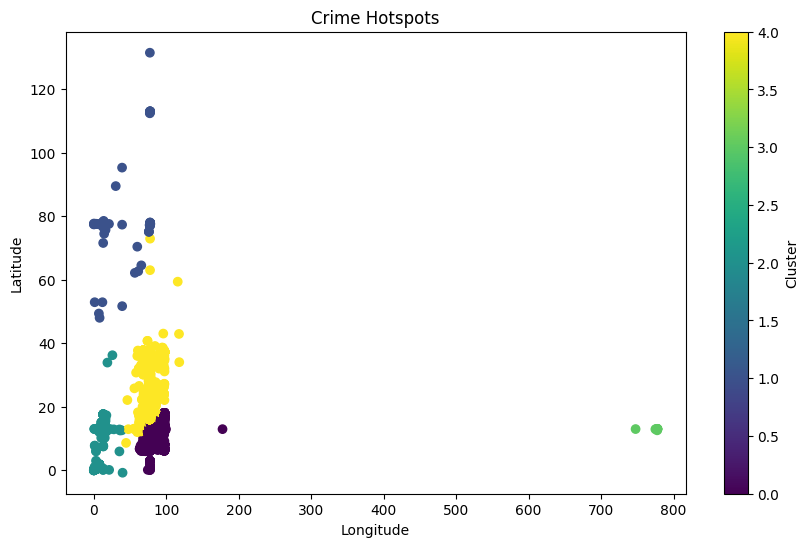

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots')
plt.colorbar(label='Cluster')
plt.show()

In [9]:
# Calculate the centroid of each cluster
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude {centroid[0]}, Longitude {centroid[1]}")

Cluster Centroids:
Cluster 1: Latitude -0.26422258862143544, Longitude 0.20995286302188396
Cluster 2: Latitude 5.807340212427239, Longitude -5.187200322115958
Cluster 3: Latitude -1.2370956602478993, Longitude -5.921660553559043
Cluster 4: Latitude -0.2676250405698054, Longitude 59.52073073889781
Cluster 5: Latitude 0.021399105786491693, Longitude 0.09842015522853491


In [10]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from geopy.distance import distance

# Assuming you have a list of latitude and longitude values for police stations
# Replace latitude_list and longitude_list with your actual lists of latitude and longitude values
latitude_list = [...]  # List of latitude values
longitude_list = [...]  # List of longitude values



In [12]:
latitude_list = [-0.26350117329990513, 5.807340212426832, -1.2370956602478118, -0.2676250405697857, 0.023547431083855475]
longitude_list = [0.20905869782346226, -5.187200322116295, -5.921660553559399, 59.52073073890124, 0.09870306054587759]

In [13]:
police_stations = pd.DataFrame({
    'Latitude': latitude_list,
    'Longitude': longitude_list
})

In [14]:
latitude_list = [-0.26350117329990513, 5.807340212426832, -1.2370956602478118, -0.2676250405697857, 0.023547431083855475]
longitude_list = [0.20905869782346226, -5.187200322116295, -5.921660553559399, 59.52073073890124, 0.09870306054587759]


In [15]:
# Define the centroids list with Latitude and Longitude for each cluster
centroids = [
    {'Latitude': -0.26350117329990513, 'Longitude': 0.20905869782346226},
    {'Latitude': 5.807340212426832, 'Longitude': -5.187200322116295},
    {'Latitude': -1.2370956602478118, 'Longitude': -5.921660553559399},
    {'Latitude': -0.2676250405697857, 'Longitude': 59.52073073890124},
    {'Latitude': 0.023547431083855475, 'Longitude': 0.09870306054587759}
]

In [16]:
# Function to calculate distance between two coordinates
def calculate_distance(coord1, coord2):
    return distance(coord1, coord2).km

In [17]:

# Assign each police station to the closest cluster
police_stations['Cluster'] = police_stations.apply(
    lambda x: min(range(5), key=lambda i: calculate_distance((x['Latitude'], x['Longitude']), 
                                                              (centroids[i]['Latitude'], centroids[i]['Longitude']))),
    axis=1
)

In [18]:
# Print the police stations with their assigned cluster
print(police_stations)

   Latitude  Longitude  Cluster
0 -0.263501   0.209059        0
1  5.807340  -5.187200        1
2 -1.237096  -5.921661        2
3 -0.267625  59.520731        3
4  0.023547   0.098703        4


In [19]:
import numpy as np

# Define the latitude and longitude of the cluster centroids
centroids = {
    1: {'Latitude': -0.26350117329990513, 'Longitude': 0.20905869782346226},
    2: {'Latitude': 5.807340212426832, 'Longitude': -5.187200322116295},
    3: {'Latitude': -1.2370956602478118, 'Longitude': -5.921660553559399},
    4: {'Latitude': -0.2676250405697857, 'Longitude': 59.52073073890124},
    5: {'Latitude': 0.023547431083855475, 'Longitude': 0.09870306054587759}
}

# Function to calculate distance between two points
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Function to find the closest centroid for each offense
def find_place_of_offense(row):
    offense_location = (row['Latitude'], row['Longitude'])
    closest_centroid = min(centroids.keys(), key=lambda x: calculate_distance(offense_location, (centroids[x]['Latitude'], centroids[x]['Longitude'])))
    return f"Cluster {closest_centroid}"

# Apply the function to each row in the DataFrame
police_stations['Place_of_Offense'] = police_stations.apply(find_place_of_offense, axis=1)

# Display the DataFrame with the assigned place of offense
print(police_stations[['Latitude', 'Longitude', 'Place_of_Offense']])


   Latitude  Longitude Place_of_Offense
0 -0.263501   0.209059        Cluster 1
1  5.807340  -5.187200        Cluster 2
2 -1.237096  -5.921661        Cluster 3
3 -0.267625  59.520731        Cluster 4
4  0.023547   0.098703        Cluster 5


In [20]:
import pandas as pd

# Assuming your dataset is named 'crime_data' and contains columns 'Latitude', 'Longitude', and 'Place_of_Offense'
# If your dataset is in a CSV file, you can read it into a DataFrame using pd.read_csv('file_path.csv')
# If your dataset is in an Excel file, you can read it using pd.read_excel('file_path.xlsx')

# Selecting all latitudes, longitudes, and places of offense
latitudes = df['Latitude']
longitudes = df['Longitude']
places_of_offense = df['Place of Offence']

# Displaying the selected data
print("Latitudes:")
print(latitudes)

print("\nLongitudes:")
print(longitudes)

print("\nPlaces of Offense:")
print(places_of_offense)


Latitudes:
605        16.054967
606        16.141122
607        16.135827
608        16.109622
609        16.109778
             ...    
1674729    16.748633
1674730    16.844536
1674731    16.556974
1674732    16.772232
1674733    16.800526
Name: Latitude, Length: 508066, dtype: float64

Longitudes:
605        75.950667
606        75.910169
607        75.919221
608        75.931844
609        75.931920
             ...    
1674729    77.133669
1674730    77.021722
1674731    77.159238
1674732    77.117018
1674733    77.141569
Name: Longitude, Length: 508066, dtype: float64

Places of Offense:
605        AMINAGAD CIT PATTANA PACHAYATI NEAR PUBLIC PLA...
606               MUGANUR BUSTAND NEAR, MUGANUR BUSTAND NEAR
607        BASAVANAL VILLAGE BAILAKUR FIELD NEAR, BASAVAN...
608        HIREMAGI VILLAGE R S NO 136/5  FIELD, HIREMAGI...
609        HIREMAGI VILLAGE R S NO 136/2 FIELD, HIREMAGI ...
                                 ...                        
1674729    at Yadgiri New Busstan

In [21]:
import pandas as pd
from geopy.distance import geodesic



In [22]:
df_sample = df.sample(frac=0.001,random_state=1)

In [23]:
df_valid = df_sample[(df_sample['Latitude'] >= -90) & (df_sample['Latitude'] <= 90)]

In [24]:
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

In [25]:
# Assign each place of offense to the closest cluster
df_valid['Cluster'] = df_valid.apply(
    lambda x: min(centroids.keys(), key=lambda c: calculate_distance((x['Latitude'], x['Longitude']), 
                                                                     (centroids[c]['Latitude'], centroids[c]['Longitude']))),
    axis=1
)

In [26]:
deployment_plan = {}
for cluster in centroids.keys():
    cluster_data = df_valid[df_valid['Cluster'] == cluster]
    number_of_incidents = len(cluster_data)
    suggestions = ""
    
    if number_of_incidents == 0:
        suggestions = "Increase police presence and conduct thorough investigations to prevent future incidents."
    elif number_of_incidents <= 10:
        suggestions = "Continue monitoring the area and conduct periodic patrols to maintain security."
    else:
        suggestions = "Intensify surveillance efforts and consider implementing community policing strategies."
    
    deployment_plan[cluster] = {
        'cluster_centroid': centroids[cluster],
        'number_of_incidents': number_of_incidents,
        'suggestions': suggestions
    }

# Print deployment plan
for cluster, data in deployment_plan.items():
    print(f"Cluster {cluster}:")
    print(f"Centroid: Latitude {data['cluster_centroid']['Latitude']}, Longitude {data['cluster_centroid']['Longitude']}")
    print(f"Number of Incidents: {data['number_of_incidents']}")
    print(f"Suggestions: {data['suggestions']}\n")


Cluster 1:
Centroid: Latitude -0.26350117329990513, Longitude 0.20905869782346226
Number of Incidents: 1
Suggestions: Continue monitoring the area and conduct periodic patrols to maintain security.

Cluster 2:
Centroid: Latitude 5.807340212426832, Longitude -5.187200322116295
Number of Incidents: 14
Suggestions: Intensify surveillance efforts and consider implementing community policing strategies.

Cluster 3:
Centroid: Latitude -1.2370956602478118, Longitude -5.921660553559399
Number of Incidents: 0
Suggestions: Increase police presence and conduct thorough investigations to prevent future incidents.

Cluster 4:
Centroid: Latitude -0.2676250405697857, Longitude 59.52073073890124
Number of Incidents: 493
Suggestions: Intensify surveillance efforts and consider implementing community policing strategies.

Cluster 5:
Centroid: Latitude 0.023547431083855475, Longitude 0.09870306054587759
Number of Incidents: 0
Suggestions: Increase police presence and conduct thorough investigations to pr